# 分水岭（WaterShed）算法 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("./30002.jpg")
"""转成灰度图像"""
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
"""转换成类似于binnary的矩阵，只有0,255两个像素值
    cv2.THRESH_BINARY_INV是把深色变为0，使用cv2.THRESH_OTSU会找到一个相对较好的阈值
    但是在这个例子中，75效果四惠更好"""
ret, thre = cv2.threshold(gray, 75, 255, cv2.THRESH_BINARY_INV)

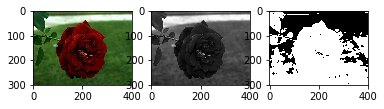

In [3]:
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(gray, cmap="gray")
plt.subplot(133)
plt.imshow(thre, cmap="gray")

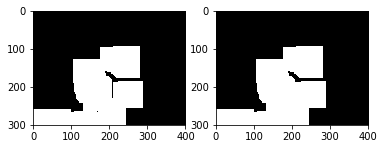

In [7]:
# noise removal
kernel = np.ones((3,3),np.uint8)
"""有两种基于上述kernel的形态学变换算子：Erosion和Dilation
    Erosion：只有kernel计算之后所有都是1，该像素才是1；（所以erosion通常会使边缘变窄）
    Dilation：只要kernel计算之后有1个是1，该像素就是1；（所以dilation通常会使边缘变宽）
    MORPH_OPEN：先Erosion后dilation，可以用于去噪；
    MORPH_CLOSE：先dilation后erosion，善于去除一些闭合的小洞或者黑点"""
opening = cv2.morphologyEx(thre, cv2.MORPH_OPEN, kernel, iterations=30)
plt.subplot(121)
plt.imshow(opening, cmap="gray")
plt.subplot(122)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(closing, cmap="gray")

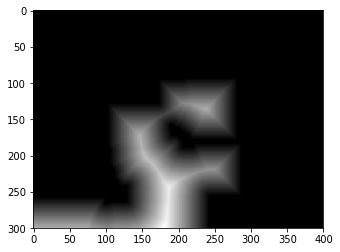

In [8]:
# distance transformation
"""distance transform 是将像素值转换为距离最近的0的距离"""
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap="gray")

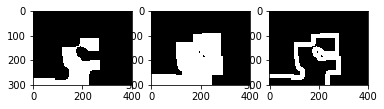

In [9]:
ret, fg = cv2.threshold(dist_transform, 15, 255, 0)
fg = np.uint8(fg)
plt.subplot(131)
plt.imshow(fg, cmap="gray")
plt.subplot(132)
bg = cv2.dilate(opening, kernel, iterations=3)
plt.imshow(bg, cmap="gray")
unknow = cv2.subtract(bg, fg)
plt.subplot(133)
plt.imshow(unknow, cmap="gray")

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]]


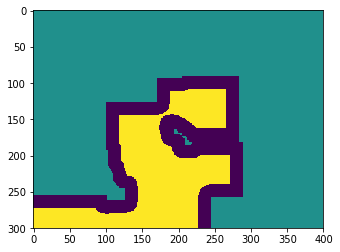

In [10]:
# Marker Labelling
ret, markers = cv2.connectedComponents(fg)
"""watershed 方式会将0视为未知区域，所以需要+1"""
markers += 1
markers[unknow==255] = 0
plt.imshow(markers)
print(markers)

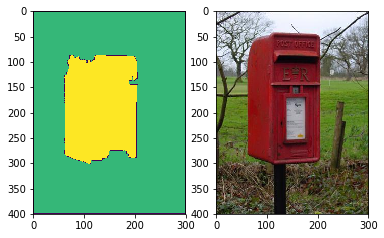

In [8]:
markers = cv2.watershed(img, markers)
plt.subplot(121)
plt.imshow(markers)
plt.subplot(122)
plt.imshow(img)

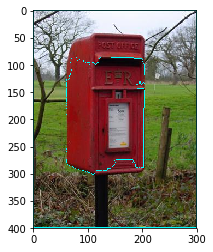

In [9]:
img[markers==-1] = [0, 255, 255]
plt.imshow(img)